I am excited to do my ***first*** data analysis project on Python against all odds, and I hope it is a success.

For this project, I have selected the **No-show appointments** dataset.

As a beginner, I have chosen simple questions

> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: No-show Appointments Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects 100,000 medical appointments in Brazil and bothers around whether the patients showed up for their appointments or not. The dataset has several variables such as Gender, Age, Neighbourhood, Scholarship and some conditions, alongside others. 

> From this dataset, we can attempt to answer questions such as:
 - Do males go to the hospital more than females? Which of the gender has a higher likelyhood to show up
 - How does having a certain disease or condition affect no-show?
 - Does receiving an SMS increase the likelihood of honoring the medical appointment?
 - How does age affect no-show?
  - Does having a scholarship increase the probability of showing up for medical appointments or not?
 - How does alcoholism affect no-show?

>For the analysis included in the notebook, I have decided to answer the following questions. 
 - *Do males go to the hospital more than females? Which of the gender has a higher likelyhood to show up*
 - *How does age affect no-show?*
 - *How does alcoholism affect no-show?*






In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('No_show.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Inspecting the data for the the shape,enumerating column headers, number of elements, unique values, missing values and for duplicate rows.
# Shape
df.shape ##This shows the number of rows and columns in the dataframe

(110527, 14)

In [4]:
#enumerating column headers to show all the columns
for i,v in enumerate(df):
    print(i,v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


## Description of the variables in the dataset

    PatientId = Identification of a patient
    AppointmentId = Identification of each appointment
    Gender = Male or Female
    ScheduledDay = The day the patient has to visit the doctor
    Appointment day = The day someone called or registered the appointment
    Age = How old the patient is
    Neighbourhood = Where the appointment takes place
    Scholarship= If the patient is sponsored by the government or not, 1 True 0 False
    Hipertension = If the patient is hypertensive, 1 is True and 0 is False
    Diabetes = If the patient has diabetes, 1 is True and 0 is False
    Alcoholism: If the customer is an alcoholic or not. 1 is True and 0 is False
    Handcap = If the customer is handicapped or not
    No_Show = No for the customer honored the appointment and Yes for a no-show.

In [5]:
#number of elements(info); I referenced https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html for the argument on info
df.info(null_counts=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>We can see from above that there are no null values in the dataset as all columns have 110527 rows.

In [6]:
#Checking for summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
#Checking for duplicate rows
sum(df.duplicated())

0

> The dataset is quite clean, as there are ***NO*** duplicated rows as shown in the code above

In [8]:
#Checking for number of unique values
df.nunique()


PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

>The unique value count above displays an interesting statistics. **All appointment IDs are unique** and therefore should have no impact on patients' no-show.

>I will delete or drop the 'AppointmentID' column 

In [9]:
#Checking for age distribution
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64



### Data Cleaning

After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.

I observed the following from the summary stats and the general properties.

    1) There is an age with a negative value
    2) AppointmentID values are all unique and will need to be dropped
    3) For the analysis, I will focus on three main variables age, gender and alcholism. I therefore will delete the rest.



In [10]:
##Deleting the Appointment id column
df.drop(['AppointmentID','PatientId','ScheduledDay','AppointmentDay','Scholarship','Hipertension','Diabetes','Handcap','SMS_received','Neighbourhood'],axis = 1, inplace=True)
df.head()


,Gender,Age,Alcoholism,No-show
0,F,62,0,No
1,M,56,0,No
2,F,62,0,No
3,F,8,0,No
4,F,56,0,No


In [11]:
##Dropping the age column, I will first check for the row with a negative value
df[df['Age'] < 0]

,Gender,Age,Alcoholism,No-show
99832,F,-1,0,No


In [12]:
#Dropping the column, referred https://www.freecodecamp.org/news/drop-list-of-rows-from-pandas-dataframe/ for how to drop specific rows or columns
df.drop(99832,axis = 0, inplace = True)

In [13]:
#Checking if the column has been dropped
df[df['Age'] < 0]

,Gender,Age,Alcoholism,No-show


In [14]:
df.info(null_counts=None)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Gender      110526 non-null  object
 1   Age         110526 non-null  int64 
 2   Alcoholism  110526 non-null  int64 
 3   No-show     110526 non-null  object
dtypes: int64(2), object(2)
memory usage: 4.2+ MB


In [15]:
#Replacing the "-" in the column name No-show to make it more readable.
#Referenced https://techoverflow.net/2021/04/03/how-to-replace-string-in-column-names-in-pandas-dataframe/#:~:text=new_df%20%3D%20df.,df%20will%20not%20be%20modified%20!
df.rename(columns=lambda s: s.replace("-", "_"), inplace=True)
print(df.Gender.unique())
print(df.Alcoholism.unique())
print(df.No_show.unique())

['F' 'M']
[0 1]
['No' 'Yes']


In [16]:
#Changing No_show datatype to integers 1 0, (0 == No(the patient honored the apppointment) 1 ==Yes(the patient didnt come), and  referrenced 
#https://www.stackvidhya.com/pandas-change-column-type/#:~:text=You%20can%20change%20the%20column,used%20for%20modeling%20and%20classification.
df['No_show'].replace({'No':0,'Yes':1},inplace=True)
df["No_show"] = df["No_show"].astype(int)
print(df.No_show.value_counts())

0    88207
1    22319
Name: No_show, dtype: int64


<a id='eda'></a>
## Exploratory Data Analysis

> General Explorations: Here, I am going to plot barplots and histograms for the variables I have selected which include age, gender, alcoholism and no_show. I will be defining some functions to avoid repeated tasks.

In [17]:
#Checking for value counts for gender alcoholism and no show
print(df.Gender.value_counts())
print(df.Alcoholism.value_counts())
print(df.No_show.value_counts())

F    71839
M    38687
Name: Gender, dtype: int64
0    107166
1      3360
Name: Alcoholism, dtype: int64
0    88207
1    22319
Name: No_show, dtype: int64


In [18]:
## referenced https://www.programiz.com/python-programming/function for how to write functions
## referenced https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
## for how to change the size of a barplot on seaborn
def count_of_variable_barplot(variable):
    '''This function plots bar plots for the value counts of any selected variable.'''
    group_data_count = df.groupby(variable).count()
    table = group_data_count.reset_index()
    plt.figure(figsize=(12,12))
    sns.barplot(x= variable, y = 'No_show', data = table)
    

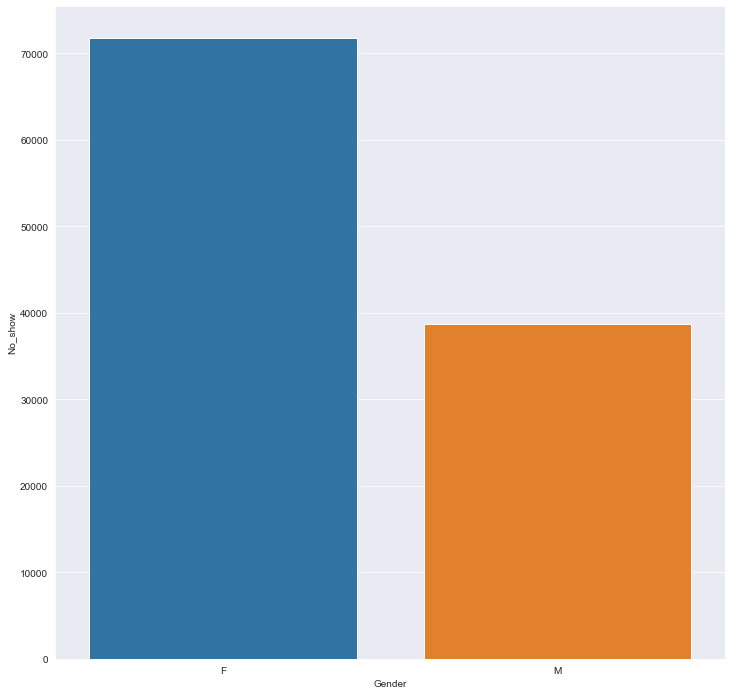

In [19]:
count_of_variable_barplot('Gender')

In [20]:
From the chart above, we can see that there are significantly more females than there are males.

SyntaxError: invalid syntax (Temp/ipykernel_2640/2420213521.py, line 1)

In [ ]:
count_of_variable_barplot('Alcoholism')

With this visualization, it is evident here that there are way less patients struggling with alcoholism compared to those that are not in the sample.

In [ ]:
count_of_variable_barplot('Age')

This chart above for age is not clear and for us to get a clearer view, we will need to group the ages into 4 different categories.
-  *Category 1* = min to 25% of the age distribution
-  *Category 2* = 25% to 50% of the age distribution
-  *Category 3* = 50% to 75% of the age distribution
-  *Category 4* = 75% to max of the age distribution

In [ ]:
df.Age.describe() ##I am using the summary stats to obtain the egdes for the distribution which are the min, Q1,Q2,Q3,max

In [ ]:
age_bin_edges = [0,18,37,55,115] ##Here, I am creating a new column to enable me see a better visual distribution for age as shown above
age_bin_names = ['min to 25%','25% to 50%','50% to 75%','75% to max']
df['Age_Bracket'] = pd.cut(df['Age'],age_bin_edges,labels = age_bin_names)
df.head()

In [ ]:
count_of_variable_barplot('Age_Bracket')

In [ ]:
df.Age_Bracket.value_counts()

From here, we can tell that the least Age bracket sampled is that of kids and teenagers. 

In [ ]:
df.groupby('Alcoholism')['No_show'].count()

In [ ]:
df.hist(figsize = (10,10));

We also can observe from the histogram above that a lot more people honored their appointments.





### We are now going to examine the likelihood of no show based on our selected variables 





In [ ]:
## referenced https://www.programiz.com/python-programming/function for how to write functions
## referenced https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
## for how to change the size of a barplot on seaborn
def no_show_barplot(variable):
    '''This function plots bar charts for any selected variable, by first grouping it.'''
    group_data_mean = df.groupby(variable)['No_show'].mean()
    table = group_data_mean.reset_index()
    plt.figure(figsize=(12,10))
    sns.barplot(x= variable, y = 'No_show', data = table)

In [ ]:
no_show_barplot('Gender')

From the visual above, a slightly higher percentage of females did not show up for their appointments

In [ ]:
no_show_barplot('Alcoholism')

From the chart above, a slightly higher percentage of patients not suffering from Alcoholism did not show for their appointments.

In [ ]:
no_show_barplot('Age')

We will examine a better view with age brackets

In [ ]:
no_show_barplot('Age_Bracket')

From the chart above, I observed that The probability for no show clearly reduces with advaced ages.
    
    


In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 1  (Do males go to the hospital more than females? Which of the gender has a higher likelyhood to show up!)

In [ ]:
counts1 = df.groupby(['Gender','No_show',],as_index=False)['Age'].sum()
counts1

In [ ]:
proportion_of_females_that_did_not_show = 527751*100 /(2266394+527751) 
proportion_of_females_that_did_not_show

In [ ]:
proportion_of_males_that_did_not_show = 238185*100/(238185+1066993)
proportion_of_males_that_did_not_show

In [ ]:
##Creating a function to display how the variables I selected  influence no_show
##referenced https://seaborn.pydata.org/generated/seaborn.countplot.html
def distribution_of_no_show(variable):
    '''This function will show plots for the selected variable and how it influences no show'''
    plt.figure(figsize=(5,8))
    sns.countplot(x = variable, data = df, hue = 'No_show')
    title_plot_with = variable + ' Distribution by No_show'
    plt.title(title_plot_with)
    plt.show()
    
     



In [ ]:
distribution_of_no_show('Gender')

### From the plot above, we can observe the following

    1)Females overall from the data set visit or consult the hospital more than males
    2)More females honored their appointment in the hospital than men; this is obviously as there are more women
    3) A slightly higher percentage of males honored their appointment than females did


### Research Question 2  (How does age affect no-show?)

In [ ]:
counts2 = df.groupby(['Age_Bracket','No_show',],as_index=False)['Age'].sum()
counts2

In [ ]:
distribution_of_no_show('Age_Bracket')

### From the plot above, we can observe the following

    1)The advanced ages are more likely to attend their medical appointments. 
    2)Patients between the ages of 18 and 37 are most likely to skip their appointments.
   

### Research Question 3  (How does alcoholism affect no-show?)

In [ ]:
counts2 = df.groupby(['Alcoholism','No_show',],as_index=False)['Age'].sum()
counts2

In [ ]:
proportion_of_patients_struggling_with_alcoholism_that_did_not_show = 31629*100/(31629+135006)
proportion_of_patients_struggling_with_alcoholism_that_did_not_show

In [ ]:
proportion_of_patients_not_struggling_with_alcoholism_that_did_not_show = 734307*100/(734307+3198381)
proportion_of_patients_not_struggling_with_alcoholism_that_did_not_show

In [ ]:
distribution_of_no_show('Alcoholism')

### From the plot above, we can observe the following

    1)A lot more patients not struggling with alcoholism were sampled
    2)Almost equal percentage of patients struggling with alcoholism and not did not show up for their appointment.
   

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!


# In conclusion,
## Our results suggested that:

    1)ALcoholism does not appear to have any impact on whether patients honor their appointment or not.
    2) Advanced age brackets appear to honor their appointments.
    3) ABout 80% of males and females attended their appointments, therefore we cannot say that females have more propensity to honor their appointments.
    
    
## Our limitations with the data include:
    1)All the statistics used here are descriptive, I did not use any inferential statistics or machine learning to arrive at my results
    2) We dont have some factors to allow us make more detailed analysis, for example, we dont know whether the patients struggling with alcohloism were scheduled for appointments to discuss their struggle with alcohol or had appointments for other sicknesses. We dont know the employment status of the patients sampled as it could guide their availability or not.
    3) The dataset has an entry with a negative age which had to be dropped 
